In [1]:
import tensorflow as tf
from tensorflow import keras #Datasets de Tensorflow

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist    # Descargar el Dataset Fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape #60000 Datos de 28x28 px

(60000, 28, 28)

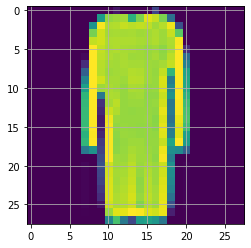

In [5]:
plt.figure()
plt.imshow(train_images[25]) #posicion 100
plt.grid(True)

In [6]:
train_images = train_images / 255.0  # 255 es el valor maximo en la escala de colores
test_images = test_images / 255.0

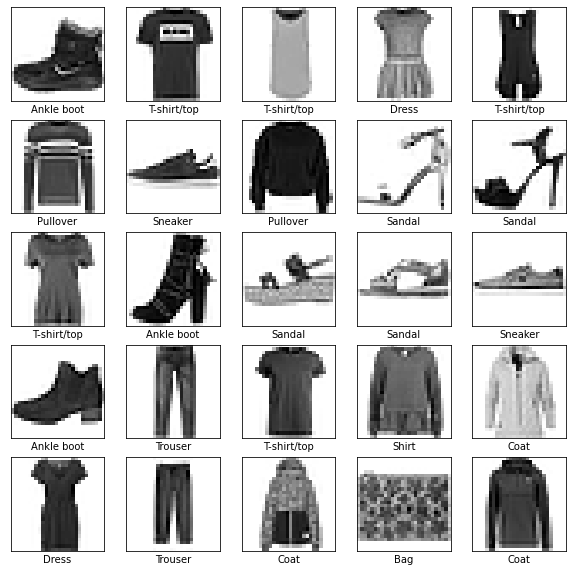

In [7]:
# Division para revisar los primeros 25 datos y sus etiquetas

%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [8]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape = (28, 28)),        # Imagenes divididas en 28 x 28 px
     keras.layers.Dense(128, activation = tf.nn.relu),    # Definir la densidad + Funcion de Activacion 
     keras.layers.Dense(10, activation = tf.nn.softmax)]
)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.compile(
    optimizer = tf.train.AdamOptimizer(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
model.fit(train_images, train_labels, epochs = 5)  # epochs = numero de iteraciones

Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4968 - acc: 0.8260
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3763 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3370 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3142 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2969 - acc: 0.8908


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3597 - acc: 0.8695
Accuracy  0.8695


In [13]:
predictions = model.predict(test_images)

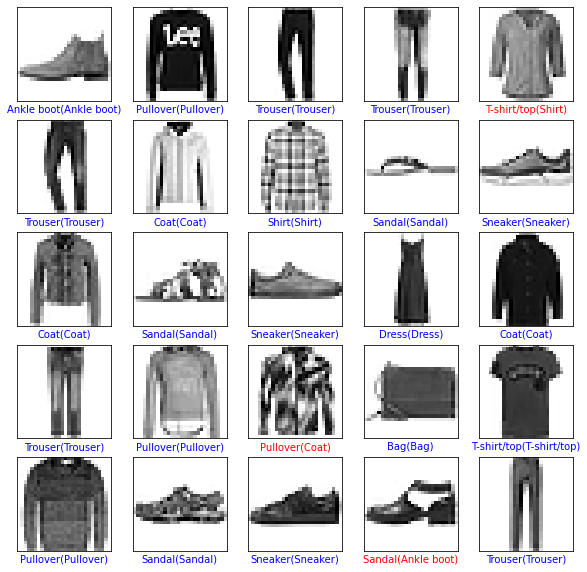

In [20]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
  
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red' 
    
    etiqueta = class_names[predicted_label] + '(' + class_names[true_label] + ')'
    plt.xlabel(etiqueta).set_color(color)